# **Download dataset Pitts30k from Google Drive**

In [7]:
from google.colab import drive
import os
import sys, os


if not os.path.isfile('/content/pitts30k.zip'):
    !gdown --id 1QpF5nO1SivJ5QOx1kkhoCeMqFvvrksey
    !jar xvf  "/content/pitts30k.zip"

if not os.path.isdir('/content/pitts30k'):
    print("Dataset Pitts30k doesn't exist")

# **Explore the Pitss30k dataset**

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler

**Count images in each set**

In [9]:
dir = "/content/pitts30k/images/"
folders = ['test', 'train', 'val']
subfolders = ['database', 'queries']

matrix = []
for f in folders:
    submatrix = []
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        number_files = len(files)
        submatrix.append(number_files)
    matrix.append(submatrix)

pd.DataFrame(matrix, columns = subfolders, index = folders)


,database,queries
test,10000,6816
train,10000,7416
val,10000,7608


**Plot data distribution** 
<br/><br/>
We want to understand how dense it is and the distribution of the labels

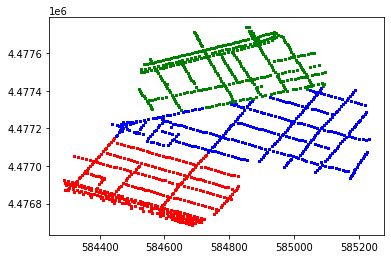

In [10]:
subfolders = ['database']
fig, ax = plt.subplots()
custom_cycler=(cycler(color=['r','g','b','y','m','c']))
ax.set_prop_cycle(custom_cycler)
for f in folders:
    for sf in subfolders:
        UTM_easting = []
        UTM_northing = []
        UTM = np.array([(name.split("@")[1], name.split("@")[2]) for name in os.listdir(dir+f+"/"+sf+"/")]).astype(float)
        ax.scatter(UTM[:,0], UTM[:,1], marker='.', linewidth=0)
plt.savefig("pitts30k.png", dpi=1200)

**Print some images**

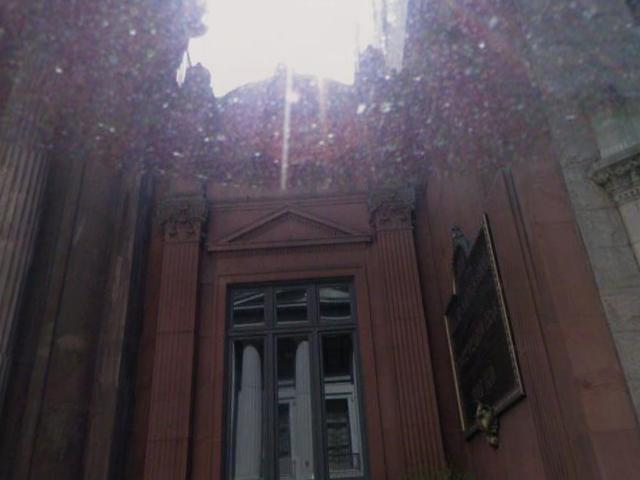

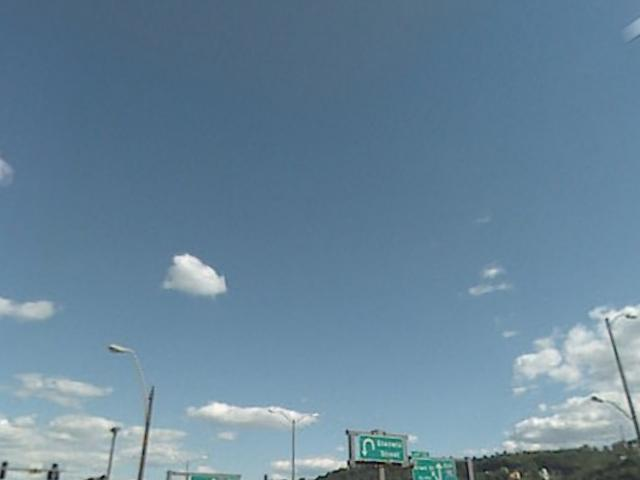

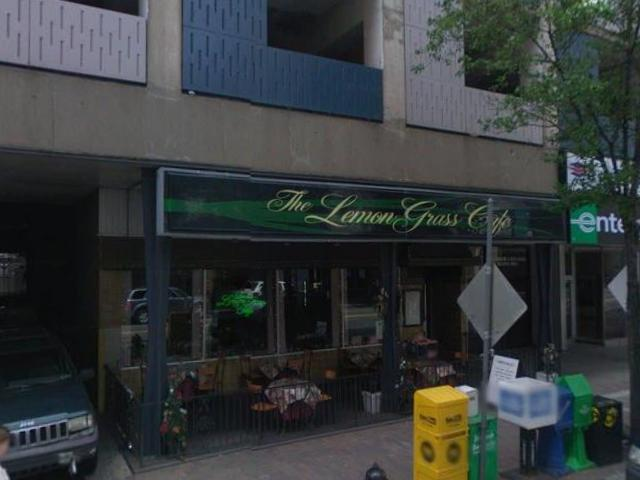

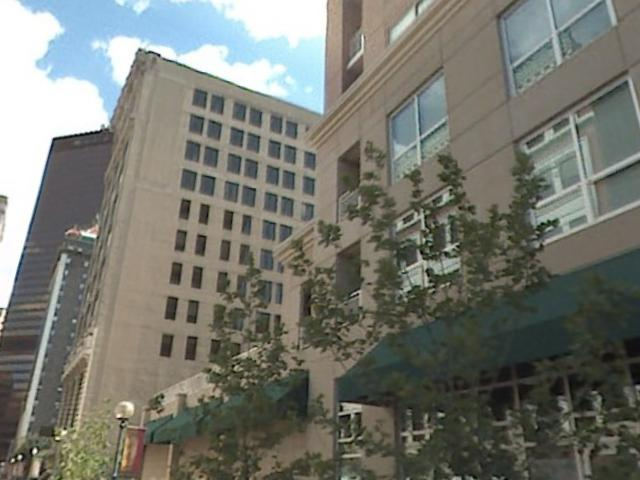

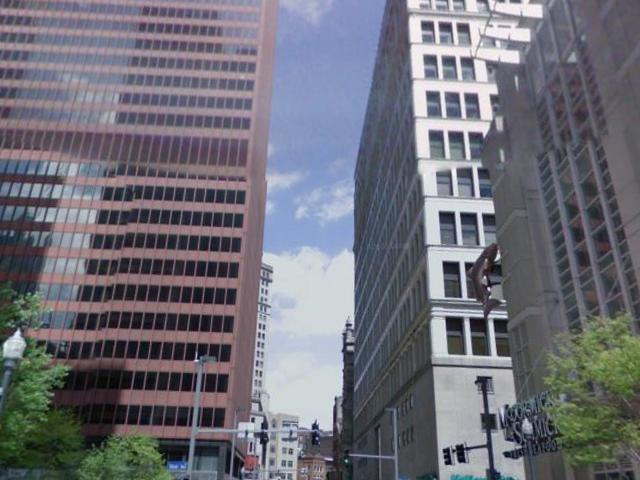

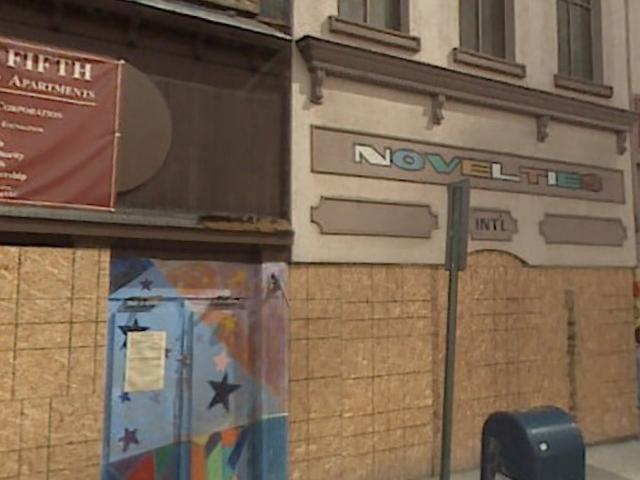

<Figure size 1800x72 with 0 Axes>

In [11]:
from random import sample
from IPython.core.display import Image, display
import torchvision.transforms as transforms
subfolders = ['database', 'queries']
fig = plt.figure(figsize=(25, 1))
for f in folders:
    for sf in subfolders:
        files = os.listdir(dir+f+"/"+sf)
        random_image = sample(files,1)  
        display(Image(filename=dir+f+"/"+sf+"/"+random_image[0]))